   ## Line Detection - Using Hough Lines
   
**cv2.HoughLines**(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
- Threshold here is the minimum vote for it to be considered a line

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

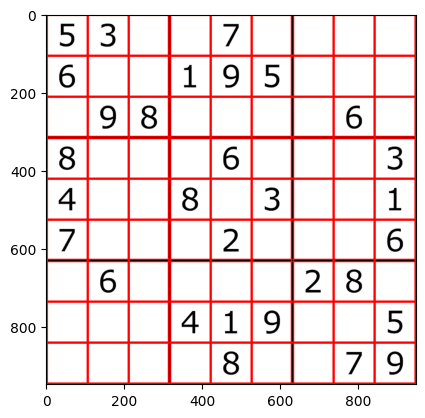

In [88]:
path = r"images\soduku2.png"

image = cv2.imread(path)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 170, apertureSize = 3)


# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold (votes) is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# print(lines)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for i in range(0,len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)


plt.imshow(image)
plt.show()

### Your task is to update the code to detect all the lines, vertical and horizontal

In [ ]:
#### Submit your answer code here


path = r"images\soduku2.png"

image = cv2.imread(path)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 170, apertureSize = 3)


# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for i in range(0,len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)


plt.imshow(image)
plt.show()


# Circle Detection - Hough Cirlces

**cv2.HoughCircles**(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)


- Method - currently only cv2.HOUGH_GRADIENT available
- dp - Inverse ratio of accumulator resolution
- MinDist - the minimum distance between the center of detected circles
- param1 - Gradient value used in the edge detection
- param2 - Accumulator threshold for the HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
- minRadius - limits the smallest circle to this size (via radius)
- MaxRadius - similarly sets the limit for the largest circles



<function matplotlib.pyplot.show(close=None, block=None)>

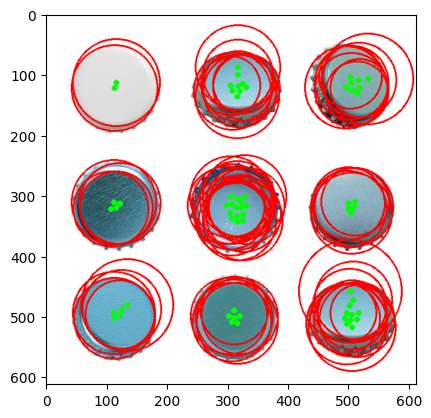

In [47]:
image = cv2.imread(r'images\bottlecaps.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 8)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)

plt.imshow(image)
plt.show

[316 321  63]


<function matplotlib.pyplot.show(close=None, block=None)>

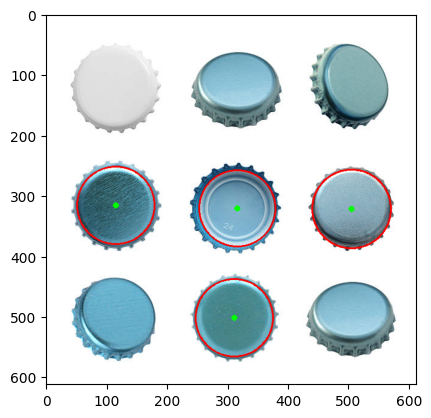

In [86]:
image = cv2.imread(r'images\bottlecaps.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.04, 20)

circles = np.uint16(np.around(circles))

print(circles[0][0])

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)

plt.imshow(image)
plt.show

## Now, write the code to detect vertical lines and horzontal lines as well as number of white coins and black coins.


None
(167.7603672294406, 0.0, 0.0, 0.0)
(137.77668526884577, 0.0, 0.0, 0.0)


<function matplotlib.pyplot.show(close=None, block=None)>

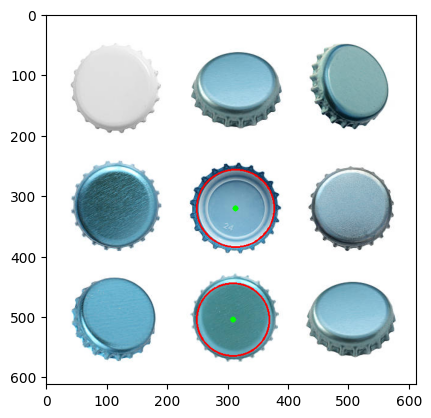

In [84]:
image = cv2.imread(r'images\bottlecaps.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 9)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.04, 20)

edges = cv2.Canny(image, 100, 170, apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)
print(lines)

circles = np.uint16(np.around(circles))

# print(circles[0][0])

for i in circles[0,:]:
    # draw the outer circle
    x = i[0]
    y = i[1]
    r = i[2]

    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)


    # Create a mask with the same size as i/p image
    mask = np.zeros_like(gray, dtype=np.uint8) 

    # Draw a filled white circle on the mask
    cv2.circle(mask, (x, y), int(r), (255, 255, 255), -1)

    average_color = cv2.mean(gray, mask=mask)

    print(average_color)

plt.imshow(image)
plt.show